In [2]:
from pandas import read_csv
import matplotlib.pyplot as plt #General Plotting
import numpy as np
from scipy.stats import multivariate_normal
from sklearn.metrics import confusion_matrix


In [3]:
newdata = np.array(read_csv('X_train.txt', sep = '\s+'))
print(newdata.shape)

labels = np.array(read_csv('y_train.txt', sep = '\s+')).T[0]
labels = np.array([i - 1 for i in labels])
print(labels.shape)

valid_classes = np.array(range(6))
print(valid_classes)

X = newdata
print(X.shape)
N = len(labels)
print("Num samples: ", N)

N_cl = np.array([sum(labels == i) for i in valid_classes])
print("Num Class Labels: ", N_cl)

priors = np.array(N_cl/N)
print("Priors: ", priors)

C = len(priors)

print(X[labels == 4].shape)



mu_hat = np.array([np.mean(X[labels == i], axis = 0) for i in valid_classes]) # No labelled samples for 0, 1, 2, 10!

reg = 0.1*np.identity(561) #7x11

Sigma_hat = np.array([np.cov(X[labels == i].T) + reg for i in valid_classes]) #7x11x11



(7351, 561)
(7351,)
[0 1 2 3 4 5]
(7351, 561)
Num samples:  7351
Num Class Labels:  [1226 1073  986 1286 1373 1407]
Priors:  [0.16678003 0.14596654 0.13413141 0.17494218 0.18677731 0.19140253]
(1373, 561)


In [4]:
# Implement minimum P(error) classification rule on all training samples
class_cond_likelihoods = np.array([multivariate_normal.pdf(X, mu_hat[c], Sigma_hat[c]) for c in range(len(valid_classes))])
priors_diag = np.diag(priors)
class_posteriors = priors_diag.dot(class_cond_likelihoods)

decisions = np.argmax(class_posteriors, axis = 0) 
decisions = np.array([i + valid_classes[0] for i in decisions]) # labels start at 3...

conf_matrix = confusion_matrix(decisions, labels)
print("Confusion Matrix:\n",conf_matrix)

errors = len(np.argwhere(decisions != labels))
print('Number of Misclassifications: ', errors, "\nError Estimate: ", errors/N)

Confusion Matrix:
 [[1225    0    2    0    0    0]
 [   1 1073   30    1    0    0]
 [   0    0  954    0    0    0]
 [   0    0    0 1064    6    0]
 [   0    0    0  221 1367    0]
 [   0    0    0    0    0 1407]]
Number of Misclassifications:  261 
Error Estimate:  0.03550537341858251


261
Minimum Probability of Error:
0.03547109236838519
Number of Misclassifications:  261 
Error Estimate:  0.03550537341858251
[[0.999 0.    0.002 0.    0.    0.   ]
 [0.001 1.    0.03  0.001 0.    0.   ]
 [0.    0.    0.968 0.    0.    0.   ]
 [0.    0.    0.    0.827 0.004 0.   ]
 [0.    0.    0.    0.172 0.996 0.   ]
 [0.    0.    0.    0.    0.    1.   ]]


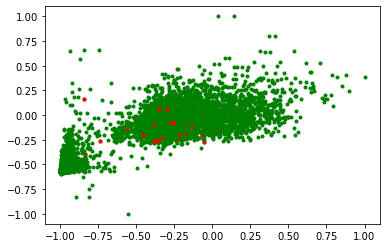

In [7]:
# Confusion matrix
conf_mat_b = np.zeros((C, C))
errors = 0

for i in valid_classes: # Each decision option
    for j in valid_classes: # Each class label
        ind_ij = np.argwhere((decisions==i) & (labels==j))
        conf_mat_b[i, j] = round(len(ind_ij)/N_cl[j],3) # Average over class sample count

        # True label = Marker shape; Decision = Marker Color
        plt.plot(X[ind_ij, 3], X[ind_ij, 10], 'g.', markersize=6)

        if i != j:
            errors = errors + len(ind_ij)
            plt.plot(X[ind_ij, 3], X[ind_ij, 10], 'r.', markersize=6)

# errors = len(np.argwhere(decisions != labels))
print(errors)
print("Minimum Probability of Error:")
prob_error = 1 - np.diag(conf_mat_b).dot(N_cl / N)
print(prob_error)

print('Number of Misclassifications: ', errors, "\nError Estimate: ", errors/N)

print(conf_mat_b)

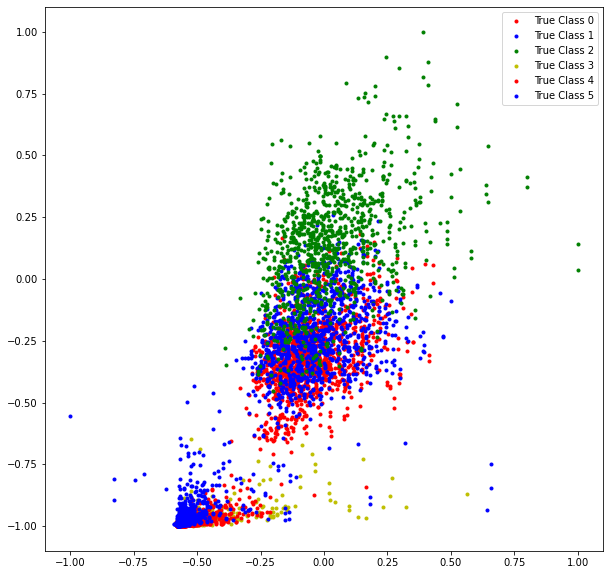

In [75]:
# Plot for original data and their true labels
fig = plt.figure(figsize=(10, 10))
marker_shapes = '.............'
marker_colors = 'rbgyrbgyrbgy' 

for i in valid_classes:
    
    plt.plot(X[labels==i, 10], X[labels==i, 3], marker_shapes[i] + marker_colors[i], label="True Class {}".format(i))

plt.legend()

(561,)


C:\Users\meuli\AppData\Local\Temp\ipykernel_31784\3427237642.py:34: ComplexWarning: Casting complex values to real discards the imaginary part
  rmse[m-1] = np.sqrt(np.mean((X[labels == j] - X_hat)**2))
C:\Users\meuli\AppData\Local\Temp\ipykernel_31784\3427237642.py:35: ComplexWarning: Casting complex values to real discards the imaginary part
  sum_eigenvals[m-1] = np.sum(D[:m])


(561,)


C:\Users\meuli\AppData\Local\Temp\ipykernel_31784\3427237642.py:34: ComplexWarning: Casting complex values to real discards the imaginary part
  rmse[m-1] = np.sqrt(np.mean((X[labels == j] - X_hat)**2))
C:\Users\meuli\AppData\Local\Temp\ipykernel_31784\3427237642.py:35: ComplexWarning: Casting complex values to real discards the imaginary part
  sum_eigenvals[m-1] = np.sum(D[:m])


(561,)


C:\Users\meuli\AppData\Local\Temp\ipykernel_31784\3427237642.py:34: ComplexWarning: Casting complex values to real discards the imaginary part
  rmse[m-1] = np.sqrt(np.mean((X[labels == j] - X_hat)**2))
C:\Users\meuli\AppData\Local\Temp\ipykernel_31784\3427237642.py:35: ComplexWarning: Casting complex values to real discards the imaginary part
  sum_eigenvals[m-1] = np.sum(D[:m])


(561,)


C:\Users\meuli\AppData\Local\Temp\ipykernel_31784\3427237642.py:34: ComplexWarning: Casting complex values to real discards the imaginary part
  rmse[m-1] = np.sqrt(np.mean((X[labels == j] - X_hat)**2))
C:\Users\meuli\AppData\Local\Temp\ipykernel_31784\3427237642.py:35: ComplexWarning: Casting complex values to real discards the imaginary part
  sum_eigenvals[m-1] = np.sum(D[:m])


(561,)


C:\Users\meuli\AppData\Local\Temp\ipykernel_31784\3427237642.py:34: ComplexWarning: Casting complex values to real discards the imaginary part
  rmse[m-1] = np.sqrt(np.mean((X[labels == j] - X_hat)**2))
C:\Users\meuli\AppData\Local\Temp\ipykernel_31784\3427237642.py:35: ComplexWarning: Casting complex values to real discards the imaginary part
  sum_eigenvals[m-1] = np.sum(D[:m])


(561,)


C:\Users\meuli\AppData\Local\Temp\ipykernel_31784\3427237642.py:34: ComplexWarning: Casting complex values to real discards the imaginary part
  rmse[m-1] = np.sqrt(np.mean((X[labels == j] - X_hat)**2))
C:\Users\meuli\AppData\Local\Temp\ipykernel_31784\3427237642.py:35: ComplexWarning: Casting complex values to real discards the imaginary part
  sum_eigenvals[m-1] = np.sum(D[:m])


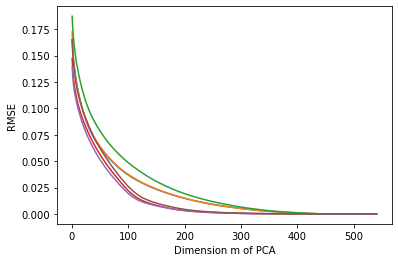

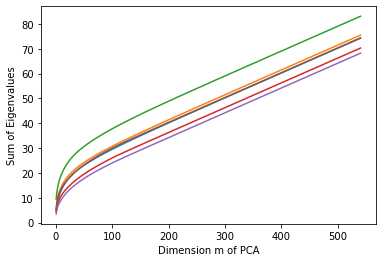

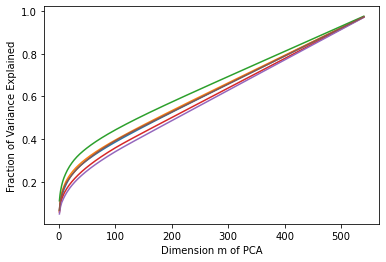

In [76]:
## PCA

# Mean-subtraction is a necessary assumption for PCA, so perform this to obtain zero-mean sample set
# C = np.array(X[labels == i] - mu_hat[i-3] for i in valid_classes)

# Get the eigenvectors (in U) and eigenvalues (in D) of the estimated covariance matrix
for j in range(len(valid_classes)):

    # Mean-subtraction is a necessary assumption for PCA, so perform this to obtain zero-mean sample set
    C = X[labels == j] - mu_hat[j]

    lambdas, U = np.linalg.eig(Sigma_hat[j])
    print(lambdas.shape)
    # Get the indices from sorting lambdas in order of increasing value, with ::-1 slicing to then reverse order
    idx = lambdas.argsort()[::-1]
    # Extract corresponding sorted eigenvectors and eigenvalues
    U = U[:, idx]
    D = np.diag(lambdas[idx])

    # Calculate the PC projections of zero-mean samples (in z)
    Z = C.dot(U)

    # Max number of PCs based on rank of X, or min(n, N)
    X_rank = np.linalg.matrix_rank(X[labels == j])

    rmse = np.zeros(X_rank)
    sum_eigenvals = np.zeros(X_rank)
    no_components = range(1, X_rank + 1)

    # Reconstruct the X data set from each set of projections
    for m in no_components:
        # Reconstruct based on only the 'm' components (also revert mean-centering effect)
        X_hat = Z[:, :m].dot(U[:, :m].T) + mu_hat[j]
        rmse[m-1] = np.sqrt(np.mean((X[labels == j] - X_hat)**2))
        sum_eigenvals[m-1] = np.sum(D[:m])
        
    # Fraction of variance explained
    fraction_var = sum_eigenvals / np.trace(Sigma_hat[j])

    # # Let's see what it looks like only along the first two PCs
    # fig = plt.figure(figsize=(10, 10))
    # plt.scatter(Z[:, 0], Z[:, 1])
    # plt.xlabel("z1")
    # plt.ylabel("z2")
    # plt.title("PCA projections to 2D space".format(valid_classes))
    # plt.show()
    # MSE should be decreasing on each iteration, 0 for the nth
    plt.figure(0)
    plt.plot(no_components, rmse)
    plt.xlabel("Dimension m of PCA")
    plt.ylabel("RMSE")

    # First eigenvalue should be significantly larger than the rest
    plt.figure(1)
    plt.plot(no_components, sum_eigenvals)
    plt.xlabel("Dimension m of PCA")
    plt.ylabel("Sum of Eigenvalues")

    # About 95% variance explined is an acceptable target 
    plt.figure(2)
    plt.plot(no_components, fraction_var)
    plt.xlabel("Dimension m of PCA")
    plt.ylabel("Fraction of Variance Explained")

(7351, 561)
(7351, 561)


c:\Users\meuli\anaconda3\lib\site-packages\matplotlib\collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
c:\Users\meuli\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\Users\meuli\anaconda3\lib\site-packages\matplotlib\collections.py:566: ComplexWarning: Casting complex values to real discards the imaginary part
  (np.asarray(self.convert_xunits(offsets[:, 0]), 'float'),
c:\Users\meuli\anaconda3\lib\site-packages\matplotlib\collections.py:567: ComplexWarning: Casting complex values to real discards the imaginary part
  np.asarray(self.convert_yunits(offsets[:, 1]), 'float')))
c:\Users\meuli\anaconda3\lib\site-packages\matplotlib\colors.py:277: ComplexWarning: Casting complex values to real discards the imaginary part
  c = tuple(map(float, c))


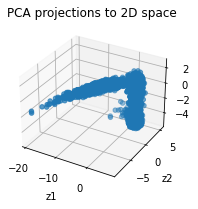

In [77]:
# First derive sample-based estimates of mean vector and covariance matrix:
mu_hat = np.mean(X, axis=0)
Sigma_hat = np.cov(X.T)

# Mean-subtraction is a necessary assumption for PCA, so perform this to obtain zero-mean sample set
C = X - mu_hat
print(C.shape)

# Get the eigenvectors (in U) and eigenvalues (in D) of the estimated covariance matrix
lambdas, U = np.linalg.eig(Sigma_hat)
# Get the indices from sorting lambdas in order of increasing value, with ::-1 slicing to then reverse order
idx = lambdas.argsort()[::-1]
# Extract corresponding sorted eigenvectors and eigenvalues
U = U[:, idx]
D = np.diag(lambdas[idx])

# Calculate the PC projections of zero-mean samples (in z)
Z = C.dot(U)
print(Z.shape)

# Let's see what it looks like only along the first two PCs
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(131, projection = '3d')
ax1.scatter(Z[:, 0], Z[:, 1], Z[:,2])
plt.xlabel("z1")
plt.ylabel("z2")
plt.title("PCA projections to 2D space")
plt.show()



In [78]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

# Max number of PCs based on rank of X, or min(n, N)
X_rank = np.linalg.matrix_rank(X)

rmse = np.zeros(X_rank)
sum_eigenvals = np.zeros(X_rank)
no_components = range(1, X_rank + 1)

# Reconstruct the X data set from each set of projections
for m in no_components:
    # Reconstruct based on only the 'm' components (also revert mean-centering effect)
    X_hat = Z[:, :m].dot(U[:, :m].T) + mu_hat
    rmse[m-1] = np.sqrt(np.mean((X - X_hat)**2))
    sum_eigenvals[m-1] = np.sum(D[:m])
    
# Fraction of variance explained
fraction_var = sum_eigenvals / np.trace(Sigma_hat)

C:\Users\meuli\AppData\Local\Temp\ipykernel_31784\3774334111.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  rmse[m-1] = np.sqrt(np.mean((X - X_hat)**2))
C:\Users\meuli\AppData\Local\Temp\ipykernel_31784\3774334111.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  sum_eigenvals[m-1] = np.sum(D[:m])


KeyboardInterrupt: 

Text(0, 0.5, 'Fraction of Variance Explained')

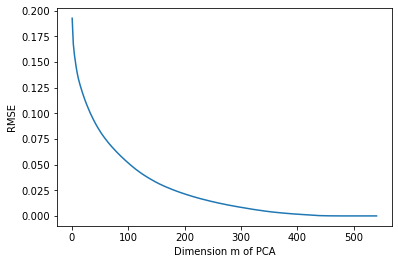

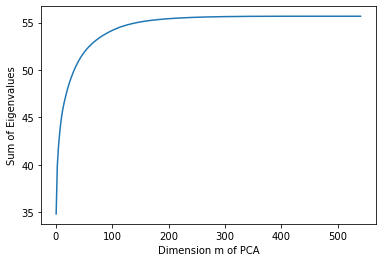

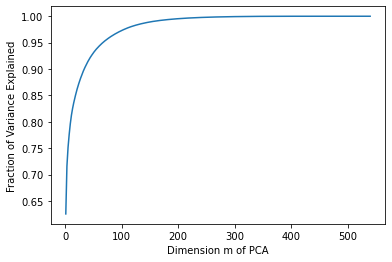

In [ ]:
# MSE should be decreasing on each iteration, 0 for the nth
plt.figure(0)
plt.plot(no_components, rmse)
plt.xlabel("Dimension m of PCA")
plt.ylabel("RMSE")

# First eigenvalue should be significantly larger than the rest
plt.figure(1)
plt.plot(no_components, sum_eigenvals)
plt.xlabel("Dimension m of PCA")
plt.ylabel("Sum of Eigenvalues")

# About 95% variance explined is an acceptable target 
plt.figure(2)
plt.plot(no_components, fraction_var)
plt.xlabel("Dimension m of PCA")
plt.ylabel("Fraction of Variance Explained")